In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import ndtri
from scipy.stats import norm, lognorm
import time
import pickle

import pymc as pm
import arviz as az
 



In [15]:
fname = 'results_raw.pickle'
# Create a writer object
file = open(fname, 'rb')

# dump information
results_decision = pickle.load(file)

# close file
file.close()

fname = 'results_raw_50.pickle'
# Create a writer object
file = open(fname, 'rb')

# dump information
results_decision_50 = pickle.load(file)

# close file
file.close()

fname = 'results_raw_25.pickle'
# Create a writer object
file = open(fname, 'rb')

# dump information
results_decision_25 = pickle.load(file)

# close file
file.close()

In [16]:
df_25 = pd.concat(results_decision_25, names=['subject'])
df_50 = pd.concat(results_decision_50, names=['subject'])

df = results_decision_50['11112']

In [18]:
mu_theta, mu_Lambda, mu_tau, mu_alpha, mu_gamma = -1.32617141, 0.41613512, -1.37750916, -0.24550931, -0.13804112
sig_theta, sig_Lambda, sig_tau, sig_alpha, sig_gamma = 0.19484903, 0.71492692,  0.17975801, 0.08284753, 0.67868274
sig_error = 1.9222773
x0 = np.array([mu_theta, sig_theta, mu_Lambda, sig_Lambda, mu_tau, sig_tau, mu_alpha, sig_alpha, mu_gamma, sig_gamma, sig_error])

distro_estimates = {'mu':{'theta': x0[0], 'Lambda': x0[2], 'tau': x0[4], 'alpha': x0[6], 'gamma': x0[8]},
                         'sigma':{'theta': x0[1], 'Lambda': x0[3], 'tau': x0[5], 'alpha': x0[7],  'gamma': x0[9], 'error':x0[10]}}
distro_estimates_export = pd.DataFrame(distro_estimates)
distro_estimates_export['exp(mu)'] = np.exp(distro_estimates_export['mu'])
distro_estimates_export.to_csv('distro_estimates_errors_tau_repeat.csv')
distro_estimates_export

 
THETA_INIT = 0.42
LAMBDA_INIT = 1.6
TAU_INIT = .28
ALPHA_INIT = .9
GAMMA_INIT = .7
ERROR_INIT = 0

INIT_VALUES = np.array([THETA_INIT, LAMBDA_INIT, TAU_INIT, ALPHA_INIT, GAMMA_INIT, ERROR_INIT])

THETA_INIT, LAMBDA_INIT, TAU_INIT, ALPHA_INIT, GAMMA_INIT, ERROR_INIT = INIT_VALUES

mu_theta, mu_Lambda, mu_tau, mu_alpha, mu_gamma      = -1.32617141, 0.41613512, -1.37750916, -0.24550931, -0.13804112
sig_theta, sig_Lambda, sig_tau, sig_alpha, sig_gamma = 0.19484903, 0.71492692,  0.17975801, 0.08284753, 0.67868274
sig_error = 1.9222773

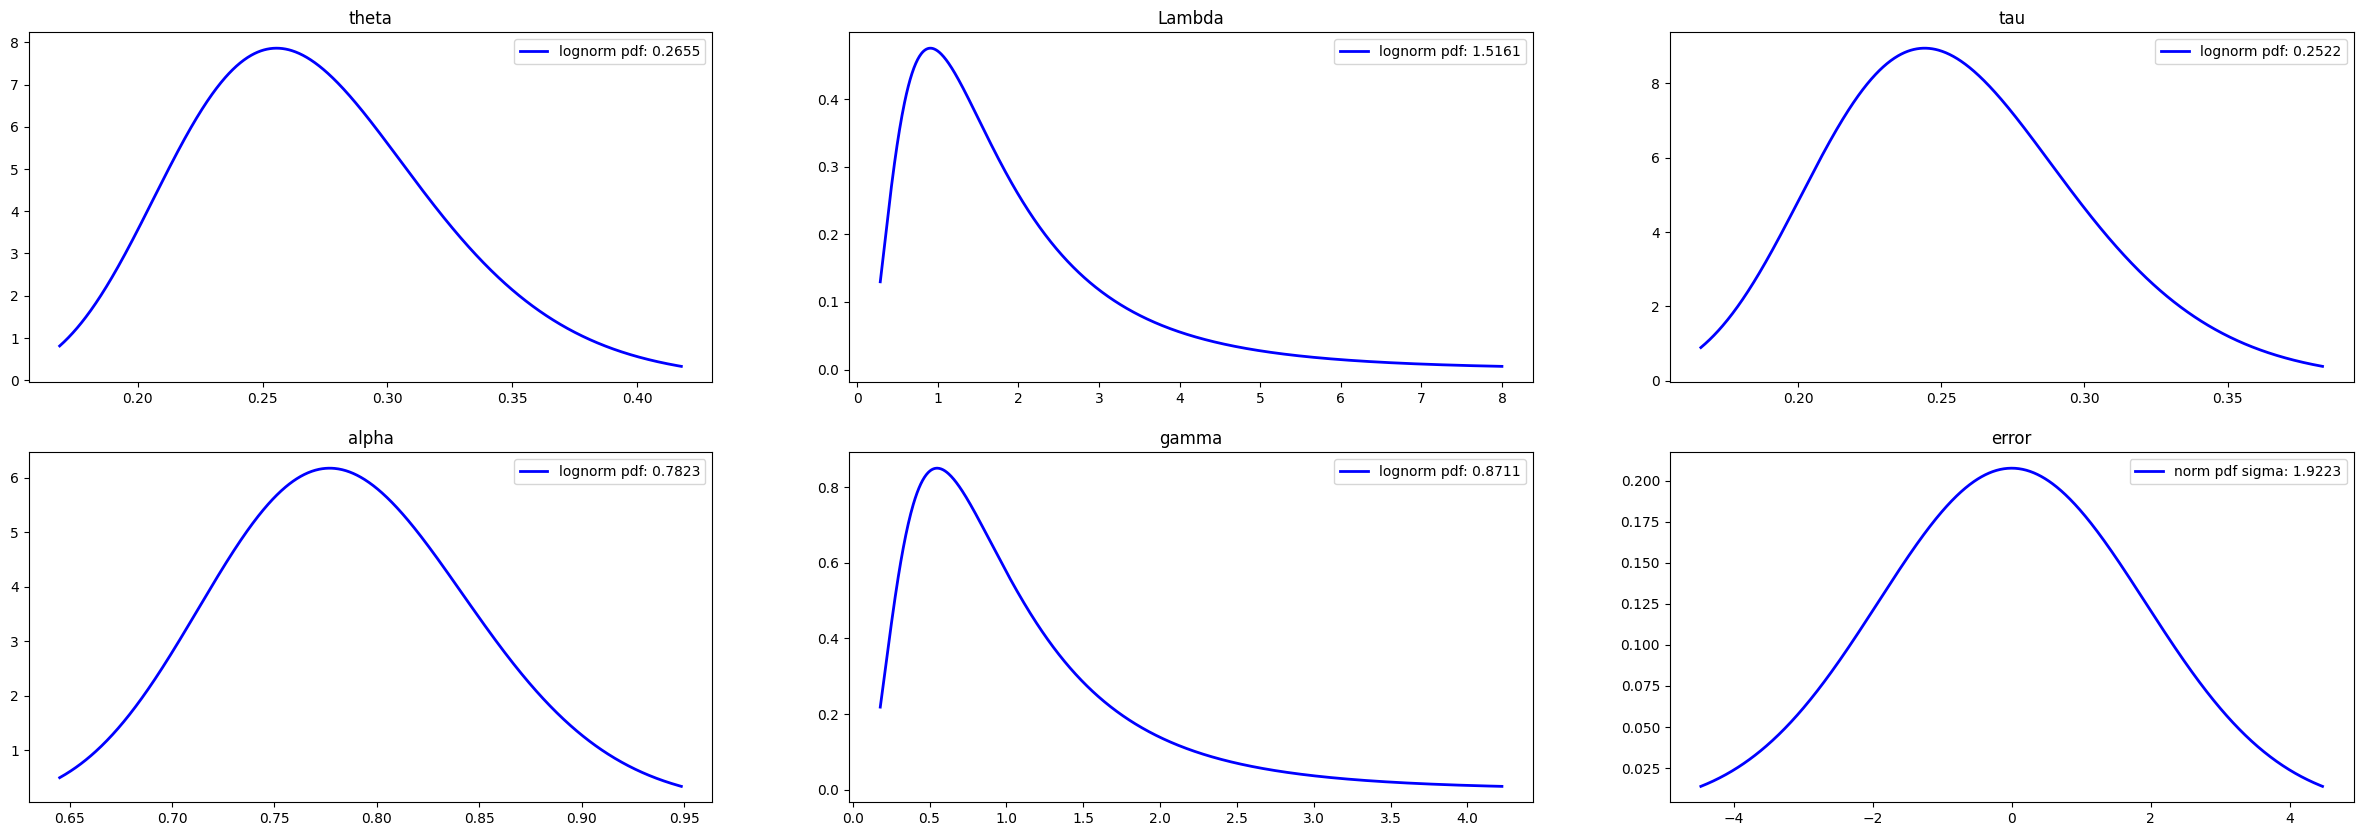

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(30,10))
for param,axis in zip(['theta', 'Lambda', 'tau', 'alpha', 'gamma','error'], [(0, 0), (0, 1), (0 ,2), (1, 0), (1, 1), (1, 2)]):
    if param=='error':
        scale = distro_estimates['sigma'][param]
        frozen_norm = norm(0, scale)
        x = np.linspace(norm.ppf(.01, 0, scale),norm.ppf(.99, 0, scale), 1000)
        axes[axis].plot(x, frozen_norm.pdf(x), 'b-', lw=2, alpha=1, label=f'norm pdf sigma: {scale:.4f}')
    else:
        s = distro_estimates['sigma'][param]
        scale = np.exp(distro_estimates['mu'][param])
        frozen_lognorm = lognorm(s, 0, scale)
        x = np.linspace(lognorm.ppf(.01, s, 0, scale),lognorm.ppf(.99, s, 0, scale), 1000)
        axes[axis].plot(x, frozen_lognorm.pdf(x), 'b-', lw=2, alpha=1, label=f'lognorm pdf: {scale:.4f}')
    axes[axis].legend()
    axes[axis].set_title(param)

plt.show()

In [28]:
results_decision_50.keys()
df = results_decision_50['11112']

In [29]:
df

,trial_num,response_time,invest,prob_win,prob_loss,prob_ambi,gain,loss,lottery_trial_num,group_responsibility
0,1,13.293310,1.0,0.2,0.3,0.5,7000.0,-3000.0,29.0,0.0
1,2,5.902034,0.0,0.2,0.0,0.8,10000.0,-6000.0,46.0,0.0
2,3,7.698850,1.0,0.4,0.3,0.3,4000.0,-2000.0,19.0,0.0
3,4,10.992664,0.0,0.5,0.0,0.5,3000.0,-7000.0,3.0,0.0
4,5,7.219638,1.0,0.0,0.2,0.8,5000.0,-1000.0,43.0,0.0
5,6,8.089982,0.0,0.1,0.4,0.5,8000.0,-3000.0,28.0,0.0
6,7,6.801851,0.0,0.4,0.0,0.6,8000.0,-10000.0,37.0,0.0
7,8,5.957266,0.0,0.1,0.1,0.8,8000.0,-4000.0,45.0,0.0
8,9,7.474308,1.0,0.4,0.1,0.5,7000.0,-5000.0,31.0,0.0
9,10,5.517789,0.0,0.2,0.1,0.7,5000.0,-4000.0,41.0,0.0


In [21]:
import pymc as pm
import numpy as np
import pandas as pd
import aesara.tensor as at

# Load the investment decisions data
# data = pd.read_csv('../data/investment_decisions.csv')

# Assume df is your subject's DataFrame, and distro_estimates is as defined

FACTOR = 1/100
beta = 0.88

# Helper functions rewritten for Aesara tensors

def lognormal_pdf(value, mu, sigma):
    ''' Function to calculate the lognormal density'''
    shape  = sigma
    loc    = 0
    scale  = np.exp(mu)
    return lognorm.pdf(value, shape, loc, scale)

def normal_pdf(value, mu, sigma):
    ''' Function to calculate the lognormal density'''
    loc    = 0
    scale  = sigma
    return norm.pdf(value, loc, scale)

def calc_eta(green, red, theta, prob_ambi):
    # prob_ambi is always provided in your data
    return green + prob_ambi * theta

def calc_subj_prob(prob, gamma):
    return prob**gamma / (prob**gamma + (1 - prob)**gamma)**(1/gamma)

def calc_subj_values(x, Lambda, alpha, beta):
    return at.switch(x >= 0, x**alpha, -Lambda * (-x)**beta)

def calc_pt_utility(gain, loss, prob_win, prob_loss, theta, Lambda, alpha, beta, gamma, prob_ambi):
    prob_g = at.clip(calc_eta(prob_win, prob_loss, theta, prob_ambi), 0, 1)
    prob_l = at.clip(calc_eta(prob_loss, prob_win, 1-theta, prob_ambi), 0, 1)
    u = (
        calc_subj_values(gain, Lambda, alpha, beta) * calc_subj_prob(prob_g, gamma) +
        calc_subj_values(loss, Lambda, alpha, beta) * calc_subj_prob(prob_l, gamma)
    )
    return u

def calc_prob_invest(utility, tau, error):
    return 1 / (1 + at.exp(-tau * (utility - error)))



In [ ]:
import time

# Prepare data

gain      = df['gain'].values * FACTOR
loss      = df['loss'].values * FACTOR
prob_win  = df['prob_win'].values
prob_loss = df['prob_loss'].values
prob_ambi = df['prob_ambi'].values
invest    = df['invest'].values.astype(int)



initvals = {
    'theta': THETA_INIT,
    'Lambda': LAMBDA_INIT,
    'tau': TAU_INIT,
    'alpha': ALPHA_INIT,
    'gamma': GAMMA_INIT,
    'error': ERROR_INIT
}

start_time = time.time()


with pm.Model() as model:
    # Priors
    theta  = pm.Lognormal('theta', mu=distro_estimates['mu']['theta'], sigma=distro_estimates['sigma']['theta'])
    Lambda = pm.Lognormal('Lambda', mu=distro_estimates['mu']['Lambda'], sigma=distro_estimates['sigma']['Lambda'])
    tau    = pm.Lognormal('tau', mu=distro_estimates['mu']['tau'], sigma=distro_estimates['sigma']['tau'])
    alpha  = pm.Lognormal('alpha', mu=distro_estimates['mu']['alpha'], sigma=distro_estimates['sigma']['alpha'])
    gamma  = pm.Lognormal('gamma', mu=distro_estimates['mu']['gamma'], sigma=distro_estimates['sigma']['gamma'])
    error  = pm.Normal('error', mu=0, sigma=distro_estimates['sigma']['error'])

    # Utility and probability
    utility = calc_pt_utility(
        gain=gain,
        loss=loss,
        prob_win=prob_win,
        prob_loss=prob_loss,
        theta=theta,
        Lambda=Lambda,
        alpha=alpha,
        beta=beta,
        gamma=gamma,
        prob_ambi=prob_ambi
    )
    p = calc_prob_invest(utility, tau, error)

    # Likelihood
    invest_obs = pm.Bernoulli('invest_obs', p=p, observed=invest)

    # Sample from the posterior
    trace = pm.sample(5000, tune=5000, target_accept=0.9, chains=4, initvals=initvals, return_inferencedata=True)
# Save the trace object for later analysis

# You can now analyze the trace object for posterior inference
pymc_time = time.time() - start_time

/var/folders/73/99zh84sx6gx2kqgq02_rm3zh0000gp/T/ipykernel_97615/2169198279.py:37: RuntimeWarning: invalid value encountered in power
  return at.switch(x >= 0, x**alpha, -Lambda * (-x)**beta)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, Lambda, tau, alpha, gamma, error]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 57 seconds.


/var/folders/73/99zh84sx6gx2kqgq02_rm3zh0000gp/T/ipykernel_97615/348971242.py:45: RuntimeWarning: invalid value encountered in power
  return at.switch(x >= 0, x**alpha, -Lambda * (-x)**beta)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, Lambda, tau, alpha, gamma, error]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 1397 seconds.


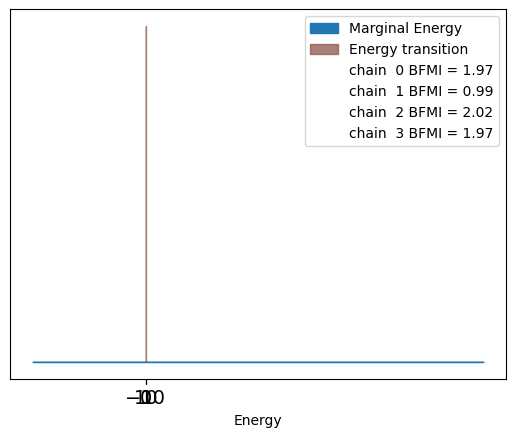

X axis values (energy):
[2.72424779e+06 2.72424639e+06 2.72424555e+06 ... 3.94473348e+08
 3.94473348e+08 3.94473349e+08]


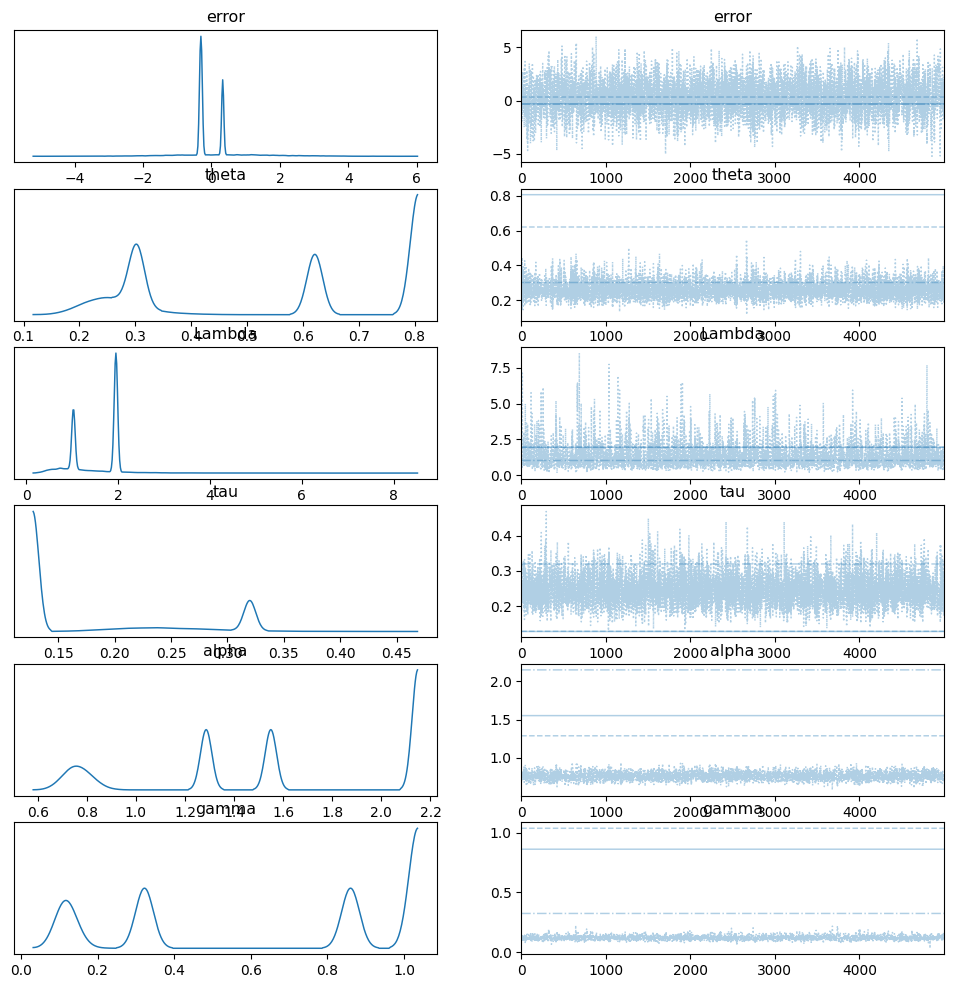

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta   0.497  0.228   0.223    0.806      0.113    0.033       5.0      26.0   
Lambda  1.555  0.587   0.497    1.962      0.207    0.100       8.0      27.0   
tau     0.205  0.085   0.128    0.320      0.041    0.011       4.0       4.0   
alpha   1.438  0.500   0.725    2.149      0.249    0.116       4.0      26.0   
gamma   0.585  0.376   0.106    1.036      0.188    0.046       4.0      27.0   
error   0.016  0.909  -1.764    2.169      0.156    0.344      13.0      26.0   

        r_hat  
theta    2.89  
Lambda   2.38  
tau      3.29  
alpha    3.98  
gamma    3.98  
error    2.61  
PyMC fitting time: 1410.75 seconds


In [24]:



def pymc_wrapper(df, distro_estimates, INIT_VALUES, FACTOR=1, beta=0.88, energy_plot_flag=True, distri_plot_flag=True):
    """
    Wrapper function for PyMC model fitting.
    """
    
    
    gain      = df['gain'].values * FACTOR
    loss      = df['loss'].values * FACTOR
    prob_win  = df['prob_win'].values
    prob_loss = df['prob_loss'].values
    prob_ambi = df['prob_ambi'].values
    invest    = df['invest'].values.astype(int)

    THETA_INIT, LAMBDA_INIT, TAU_INIT, ALPHA_INIT, GAMMA_INIT, ERROR_INIT = INIT_VALUES
    initvals = {
        'theta': THETA_INIT,
        'Lambda': LAMBDA_INIT,
        'tau': TAU_INIT,
        'alpha': ALPHA_INIT,
        'gamma': GAMMA_INIT,
        'error': ERROR_INIT
    }

    def lognormal_pdf(value, mu, sigma):
        ''' Function to calculate the lognormal density'''
        shape  = sigma
        loc    = 0
        scale  = np.exp(mu)
        return lognorm.pdf(value, shape, loc, scale)

    def normal_pdf(value, mu, sigma):
        ''' Function to calculate the lognormal density'''
        loc    = 0
        scale  = sigma
        return norm.pdf(value, loc, scale)

    def calc_eta(green, red, theta, prob_ambi):
        # prob_ambi is always provided in your data
        return green + prob_ambi * theta

    def calc_subj_prob(prob, gamma):
        return prob**gamma / (prob**gamma + (1 - prob)**gamma)**(1/gamma)

    def calc_subj_values(x, Lambda, alpha, beta):
        return at.switch(x >= 0, x**alpha, -Lambda * (-x)**beta)

    def calc_pt_utility(gain, loss, prob_win, prob_loss, theta, Lambda, alpha, beta, gamma, prob_ambi):
        prob_g = at.clip(calc_eta(prob_win, prob_loss, theta, prob_ambi), 0, 1)
        prob_l = at.clip(calc_eta(prob_loss, prob_win, 1-theta, prob_ambi), 0, 1)
        u = (
            calc_subj_values(gain, Lambda, alpha, beta) * calc_subj_prob(prob_g, gamma) +
            calc_subj_values(loss, Lambda, alpha, beta) * calc_subj_prob(prob_l, gamma)
        )
        return u

    def calc_prob_invest(utility, tau, error):
        return 1 / (1 + at.exp(-tau * (utility - error)))
    
    
    with pm.Model() as model:
        # Priors
        theta  = pm.Lognormal('theta', mu=distro_estimates['mu']['theta'], sigma=distro_estimates['sigma']['theta'])
        Lambda = pm.Lognormal('Lambda', mu=distro_estimates['mu']['Lambda'], sigma=distro_estimates['sigma']['Lambda'])
        tau    = pm.Lognormal('tau', mu=distro_estimates['mu']['tau'], sigma=distro_estimates['sigma']['tau'])
        alpha  = pm.Lognormal('alpha', mu=distro_estimates['mu']['alpha'], sigma=distro_estimates['sigma']['alpha'])
        gamma  = pm.Lognormal('gamma', mu=distro_estimates['mu']['gamma'], sigma=distro_estimates['sigma']['gamma'])
        error  = pm.Normal('error', mu=0, sigma=distro_estimates['sigma']['error'])

        # Utility and probability
        utility = calc_pt_utility(
            gain=gain,
            loss=loss,
            prob_win=prob_win,
            prob_loss=prob_loss,
            theta=theta,
            Lambda=Lambda,
            alpha=alpha,
            beta=beta,
            gamma=gamma,
            prob_ambi=prob_ambi
        )
        p = calc_prob_invest(utility, tau, error)

        # Likelihood
        invest_obs = pm.Bernoulli('invest_obs', p=p, observed=invest)
        
        trace = pm.sample(5000, tune=5000, target_accept=0.9, chains=4, initvals=initvals, return_inferencedata=True)

        
        # # Define batch_size and max_draws for sampling
        # batch_size = 1000
        # max_draws = 5000
        # draws = 0
        # converged = False
        # trace = None

        # while draws < max_draws and not converged:
        #     new_trace = pm.sample(
        #         draws=batch_size,
        #         tune=0 if trace is not None else batch_size,
        #         target_accept=0.9,
        #         chains=4,
        #         initvals=initvals if trace is None else None,
        #         return_inferencedata=True,
        #         progressbar=True
        #     )
        #     # Concatenate traces
        #     if trace is None:
        #         trace = new_trace
        #     trace = az.concat(trace, new_trace, dim="draw")

        #     draws += batch_size

        #     # Check convergence using r_hat
        #     summary = az.summary(trace, var_names=["theta", "Lambda", "tau", "alpha", "gamma", "error"])
        #     r_hat = summary['r_hat'].max()
        #     print(f"Draws: {draws}, max r_hat: {r_hat:.3f}")
        #     if r_hat < 1.01:
        #         converged = True

        # if not converged:
        #     print("Warning: Maximum draws reached before convergence.")

        #     # Check convergence using r_hat
        #     summary = az.summary(trace, var_names=["theta", "Lambda", "tau", "alpha", "gamma", "error"])
        #     r_hat = summary['r_hat'].max()
        #     print(f"Draws: {draws}, max r_hat: {r_hat:.3f}")
        #     if r_hat < 1.01:
        #         converged = True

        # if not converged:
        #     print("Warning: Maximum draws reached before convergence.")


        if energy_plot_flag:
            az.plot_energy(trace)
            plt.xlabel("Energy")
            energy = trace.sample_stats["energy"].values.flatten()
            plt.xticks(np.round(np.linspace(-10, 10, num=3), 2))
            plt.show()
            print("X axis values (energy):")
            print(energy)    
            
        if distri_plot_flag:
            az.plot_trace(trace, combined=True)
            plt.show()
            
        # Extract posterior means for each parameter from the trace
        summary = az.summary(trace, var_names=["theta", "Lambda", "tau", "alpha", "gamma", "error"])
        print(summary)
    
    return trace



def pymc_predict(trace, df, FACTOR=1, beta=0.88):
    """
    Function to predict using the PyMC model trace.
    """
    # Extract the mean of the posterior samples for each parameter
    theta   = trace.posterior['theta'].mean().item()
    Lambda  = trace.posterior['Lambda'].mean().item()
    alpha   = trace.posterior['alpha'].mean().item()
    tau     = trace.posterior['tau'].mean().item()
    gamma   = trace.posterior['gamma'].mean().item()
    error   = trace.posterior['error'].mean().item()

    predictions = []

    for _, row in df.iterrows():
        gain = row['gain'] * FACTOR
        loss = row['loss'] * FACTOR 
        prob_win = row['prob_win']
        prob_loss = row['prob_loss']
        prob_ambi = row['prob_ambi']

        def np_calc_subj_values(x, Lambda, alpha, beta):
            return x**alpha if x >= 0 else -Lambda * ((-x)**beta)

        def np_calc_eta(green, red, theta, prob_ambi):
            return green + prob_ambi * theta

        def np_calc_subj_prob(prob, gamma):
            return prob**gamma / (prob**gamma + (1 - prob)**gamma)**(1/gamma)

        prob_g = np.clip(np_calc_eta(prob_win, prob_loss, theta, prob_ambi), 0, 1)
        prob_l = np.clip(np_calc_eta(prob_loss, prob_win, 1-theta, prob_ambi), 0, 1)
        subj_gain = np_calc_subj_values(gain, Lambda, alpha, beta)
        subj_loss = np_calc_subj_values(loss, Lambda, alpha, beta)
        subj_prob_g = np_calc_subj_prob(prob_g, gamma)
        subj_prob_l = np_calc_subj_prob(prob_l, gamma)
        utility = subj_gain * subj_prob_g + subj_loss * subj_prob_l

        # Probability to invest
        p_invest = 1 / (1 + np.exp(-tau * (utility - error)))
        
        # Predict invest = 1 if p_invest > 0.5, else 0
        invest_pred = int(p_invest > 0.5)
        predictions.append(invest_pred)

    return predictions


# You can now analyze the trace object for posterior inference
start_time_pymc = time.time()

trace = pymc_wrapper(df, distro_estimates, INIT_VALUES, FACTOR=1, beta=0.88, energy_plot_flag=True, distri_plot_flag=True)

pymc_time = time.time() - start_time_pymc
print(f"PyMC fitting time: {pymc_time:.2f} seconds")

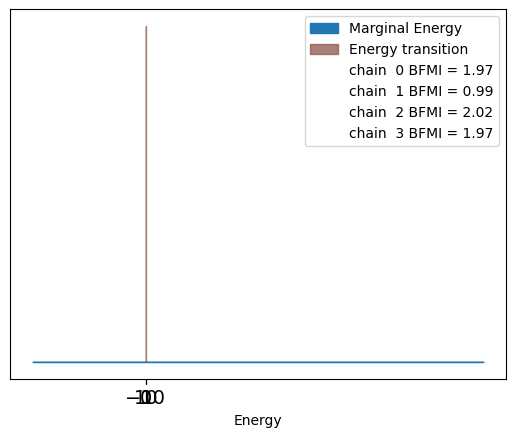

X axis values (energy):
[2.72424779e+06 2.72424639e+06 2.72424555e+06 ... 3.94473348e+08
 3.94473348e+08 3.94473349e+08]


In [25]:
import arviz as az

az.plot_energy(trace)
plt.xlabel("Energy")
energy = trace.sample_stats["energy"].values.flatten()
plt.xticks(np.round(np.linspace(-10, 10, num=3), 2))
plt.show()
print("X axis values (energy):")
print(energy)

array([[<Axes: title={'center': 'error'}>,
        <Axes: title={'center': 'error'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'Lambda'}>,
        <Axes: title={'center': 'Lambda'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'gamma'}>,
        <Axes: title={'center': 'gamma'}>]], dtype=object)

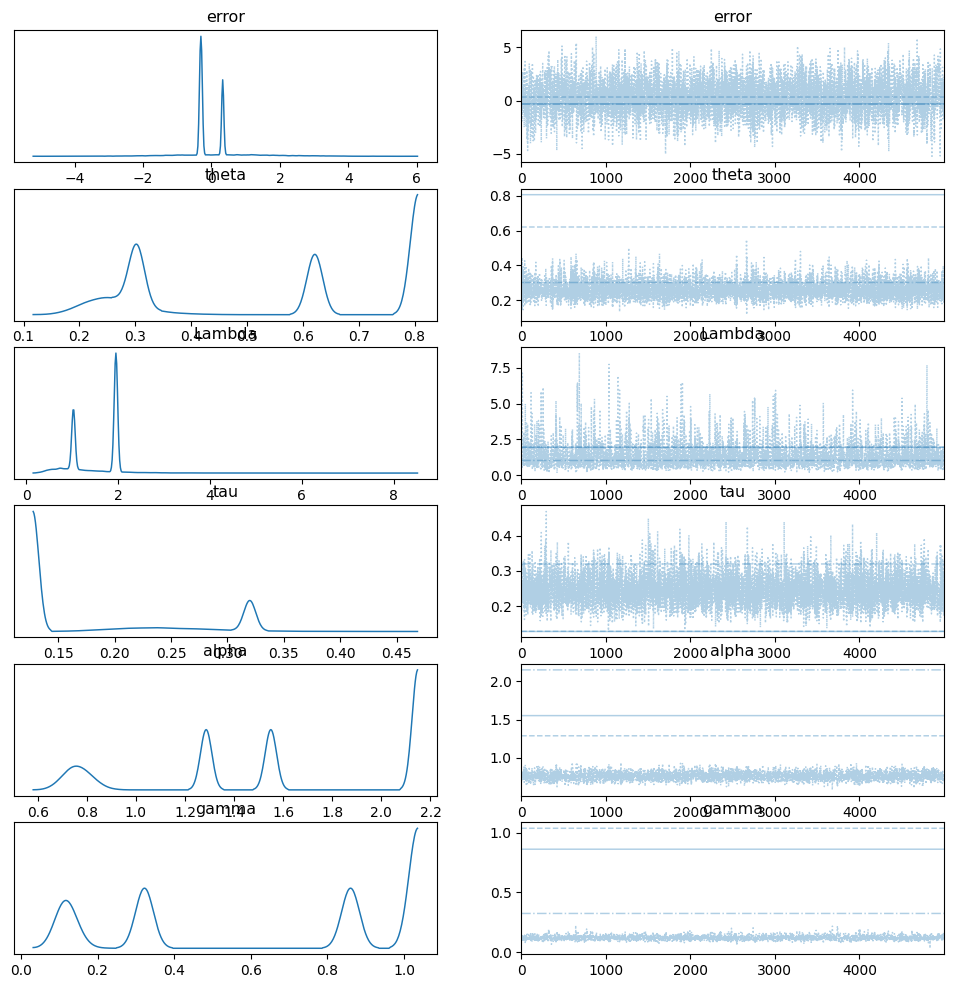

In [26]:
az.plot_trace(trace, combined=True)


In [27]:
# Extract posterior means for each parameter from the trace
summary = az.summary(trace, var_names=["theta", "Lambda", "tau", "alpha", "gamma", "error"])
print(summary)

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta   0.497  0.228   0.223    0.806      0.113    0.033       5.0      26.0   
Lambda  1.555  0.587   0.497    1.962      0.207    0.100       8.0      27.0   
tau     0.205  0.085   0.128    0.320      0.041    0.011       4.0       4.0   
alpha   1.438  0.500   0.725    2.149      0.249    0.116       4.0      26.0   
gamma   0.585  0.376   0.106    1.036      0.188    0.046       4.0      27.0   
error   0.016  0.909  -1.764    2.169      0.156    0.344      13.0      26.0   

        r_hat  
theta    2.89  
Lambda   2.38  
tau      3.29  
alpha    3.98  
gamma    3.98  
error    2.61  


,trial_num,response_time,invest,prob_win,prob_loss,prob_ambi,gain,loss,lottery_trial_num,group_responsibility
0,1,13.293310,1.0,0.2,0.3,0.5,7000.0,-3000.0,29.0,0.0
1,2,5.902034,0.0,0.2,0.0,0.8,10000.0,-6000.0,46.0,0.0
2,3,7.698850,1.0,0.4,0.3,0.3,4000.0,-2000.0,19.0,0.0
3,4,10.992664,0.0,0.5,0.0,0.5,3000.0,-7000.0,3.0,0.0
4,5,7.219638,1.0,0.0,0.2,0.8,5000.0,-1000.0,43.0,0.0
5,6,8.089982,0.0,0.1,0.4,0.5,8000.0,-3000.0,28.0,0.0
6,7,6.801851,0.0,0.4,0.0,0.6,8000.0,-10000.0,37.0,0.0
7,8,5.957266,0.0,0.1,0.1,0.8,8000.0,-4000.0,45.0,0.0
8,9,7.474308,1.0,0.4,0.1,0.5,7000.0,-5000.0,31.0,0.0
9,10,5.517789,0.0,0.2,0.1,0.7,5000.0,-4000.0,41.0,0.0
